In [1]:
# import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('./archive/OnlineNewsPopularity.csv')

In [4]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
df.shape

(39644, 61)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [7]:
# removing duplicates
df=df.drop_duplicates()

In [8]:
df.shape  # there are no duplicates

(39644, 61)

In [9]:
#checking for all variables that contain missing values
n=df.isna().sum()
n[n>0]

Series([], dtype: int64)

In [10]:
# there are no duplicates

## Exploratory Data Analysis

In [11]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [12]:
df.dtypes

url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object

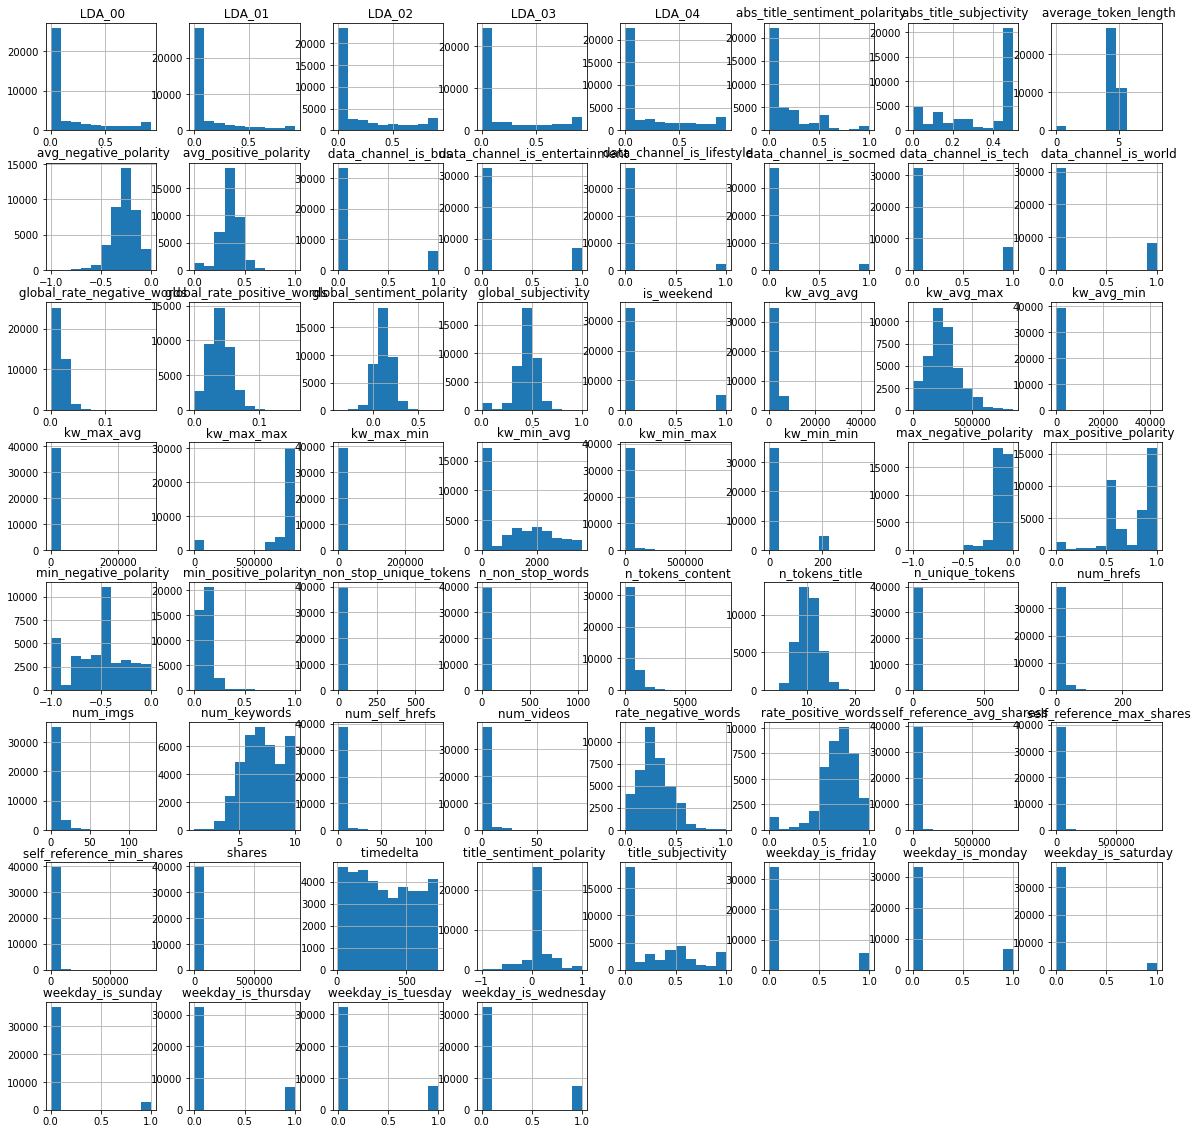

In [13]:
df.hist(figsize=(20,20))
plt.show()

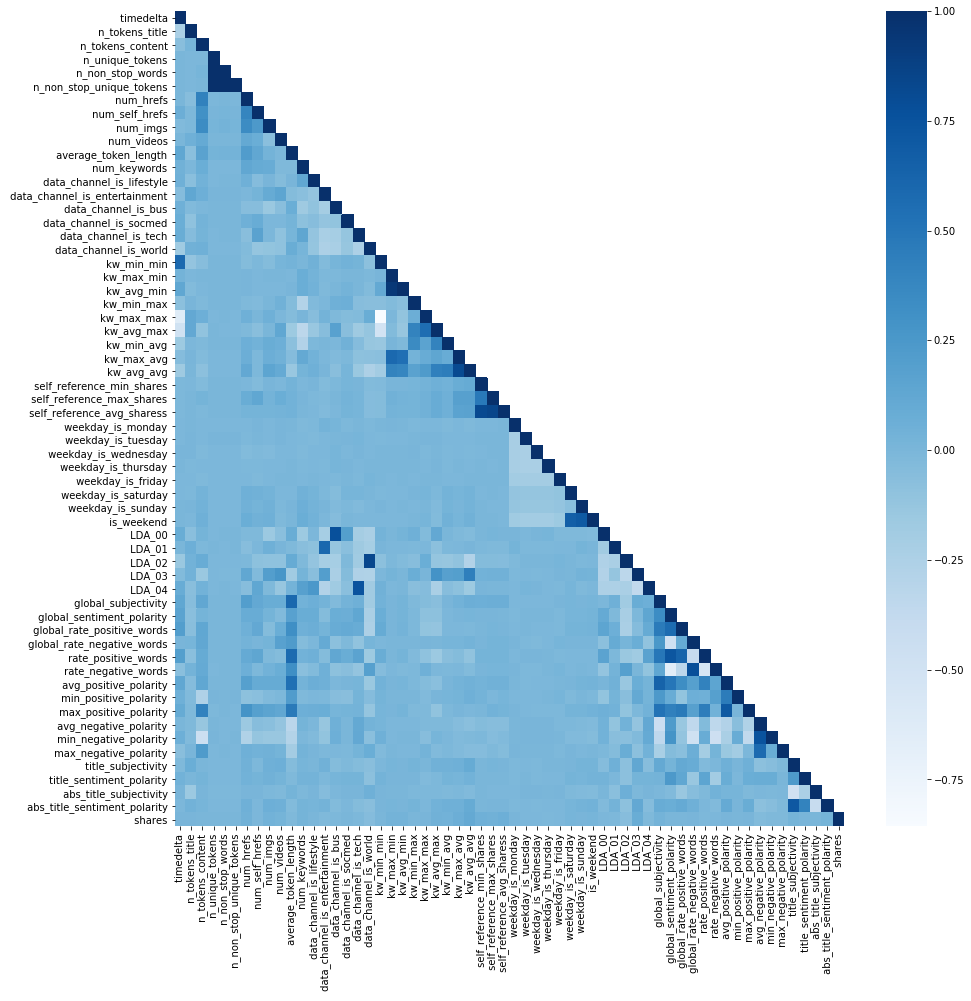

In [14]:
cor=df.corr()
#ns.heatmap(cor)
plt.figure(figsize=(15,15))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')


In [15]:
#Removing Space Character from Feature names
df.columns=df.columns.str.replace(" ","")

In [16]:
# n_tokens_content represents Number of words in the content
# However its minimum value to be 0. Means that there are articles that do not have any content.
# Such records should be dropped as their related attributes add no meaning to our analysis

# find number of rows that contain 0 for n_tokens_content
num_of_nowords=df[df['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 1181


In [17]:
# Drop these items or rows with n_tokens_content = 0

df = df[df['n_tokens_content'] != 0]

In [18]:
# Since URL is a non-numeric attribute and will not add value to our analysis so dropping it from the dataset
# Also timedelta is a non-predictive attribute and not a feature of the data set so we can drop it from the dataset
# Drop highly correlated attributes "n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"
df = df.drop('url',axis=1)
df = df.drop('timedelta',axis=1)
df= df.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

In [19]:
#Understanding target variable distribution
df['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

In [20]:
df['shares'].median()

1400.0

In [21]:
# Create a new target variable
df['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

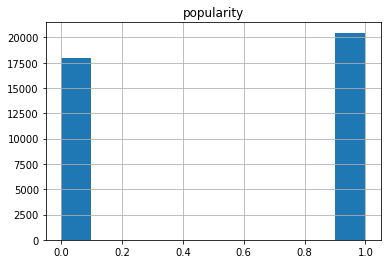

In [22]:
df.hist(column='popularity');

In [23]:
df.to_excel('news_df_clean01.xls')

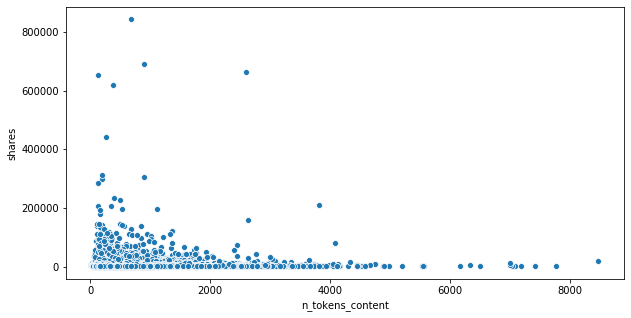

In [24]:
# Number of words in content vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_content', data=df)

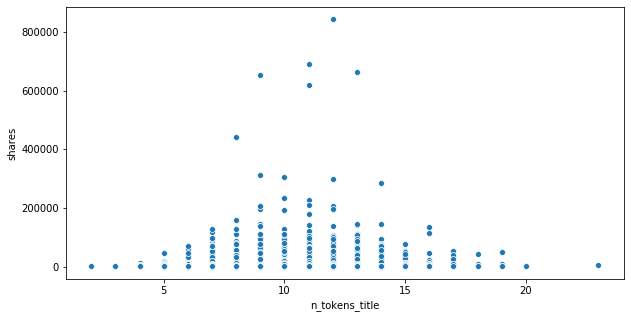

In [25]:
# Number of words in title vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_title', data=df,palette='muted');

In [26]:
a,b = df['shares'].mean(),df['shares'].median()

In [27]:
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 3355.3603983048642
Median article share = 1400.0


In [28]:
Wday = df.columns.values[26:33]
Wday

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'], dtype=object)

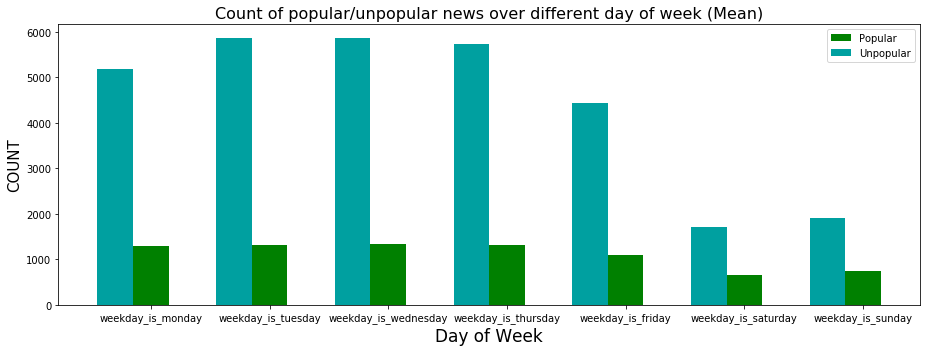

In [29]:
Unpop=df[df['shares']<a]
Pop=df[df['shares']>=a]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)
#for i, v in enumerate(Pop_day):
#    fig.text(i+25, 
#              v/Pop_day[i]+50, 
#              Pop_day[i], 
#              fontsize=5)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()


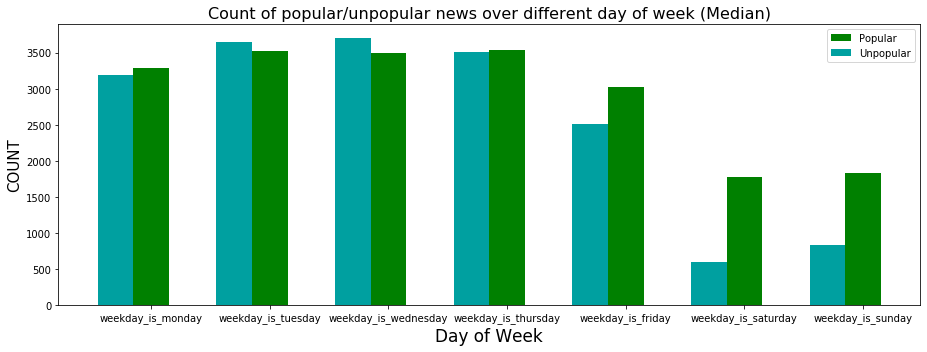

In [30]:
Unpop=df[df['shares']<b]
Pop=df[df['shares']>=b]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)
#for i, v in enumerate(Pop_day):
#    fig.text(i+25, 
#              v/Pop_day[i]+50, 
#              Pop_day[i], 
#              fontsize=5)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()


In [31]:
Dc=df.columns[9:15]
Dc


Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

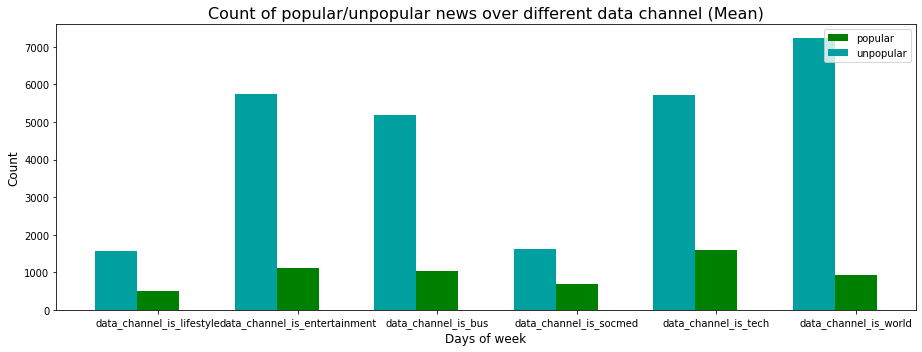

In [32]:
Unpop3=df[df['shares']<a]
Pop3=df[df['shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

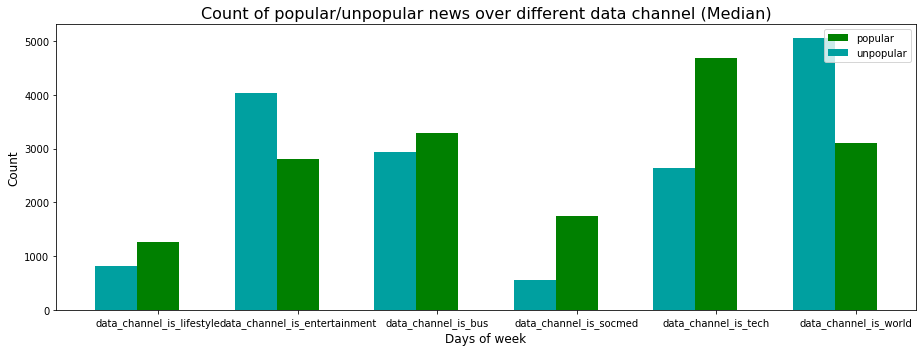

In [33]:
Unpop4=df[df['shares']<b]
Pop4=df[df['shares']>=b]
Unpop_day4 = Unpop4[Dc].sum().values
Pop_day4 = Pop4[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day4, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day4, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

## Outlier Treatment

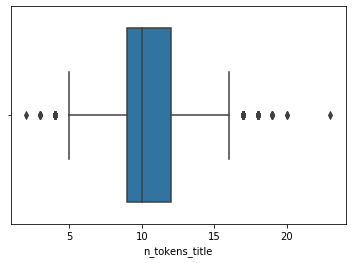

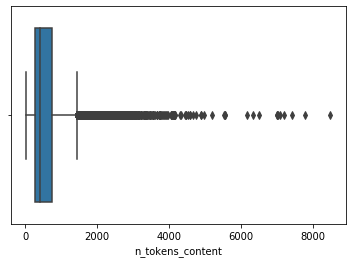

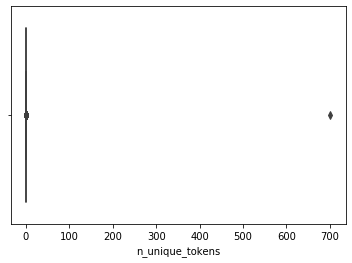

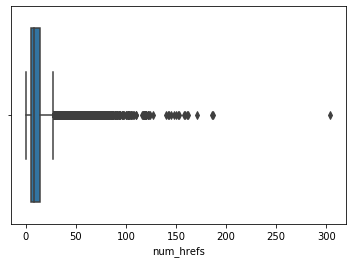

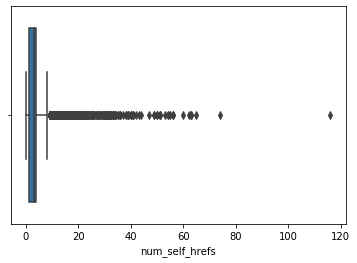

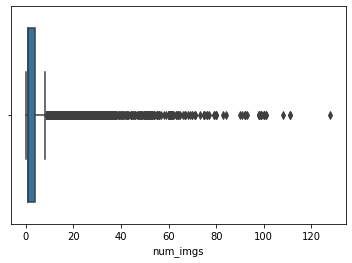

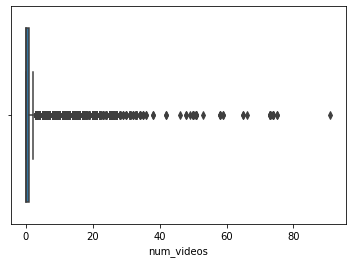

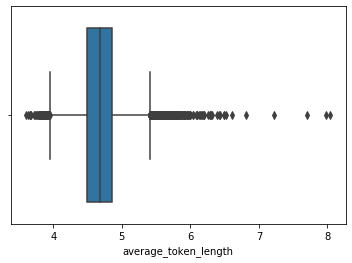

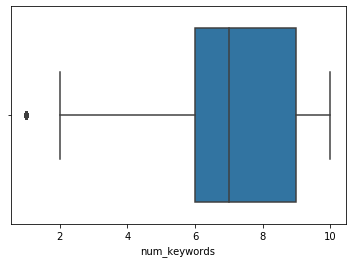

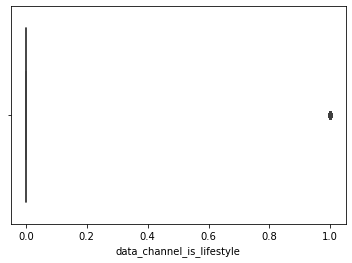

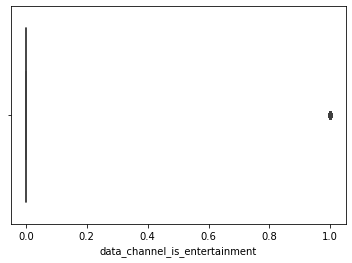

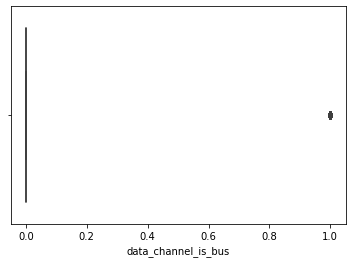

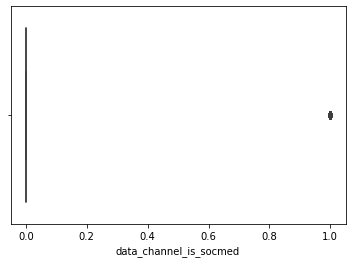

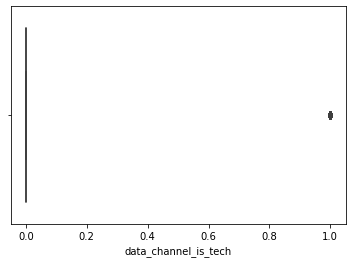

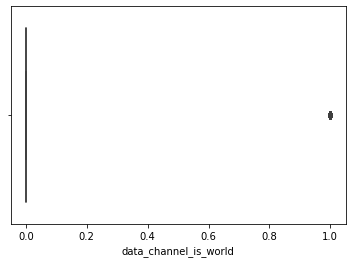

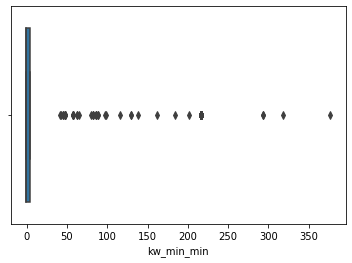

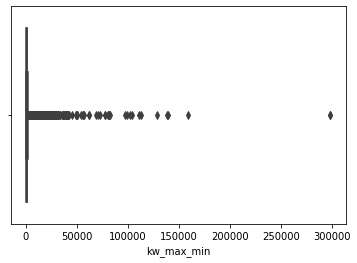

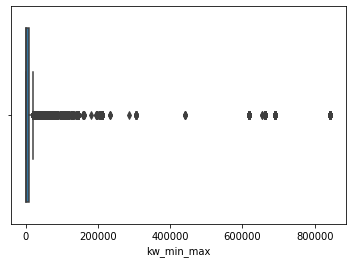

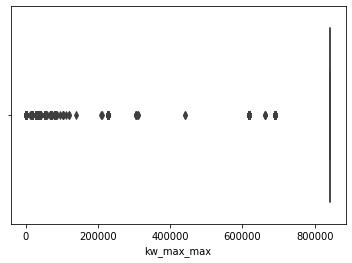

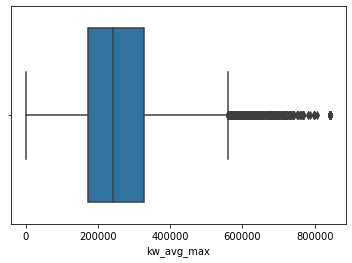

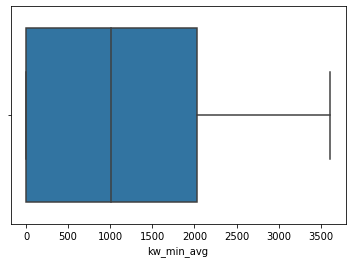

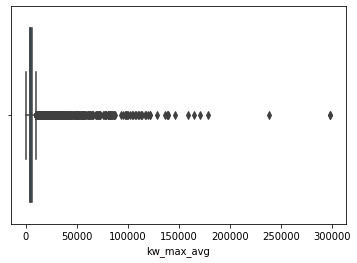

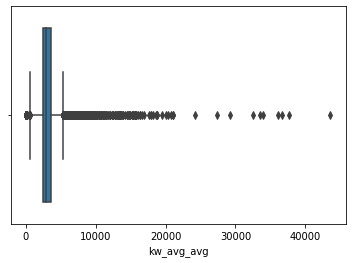

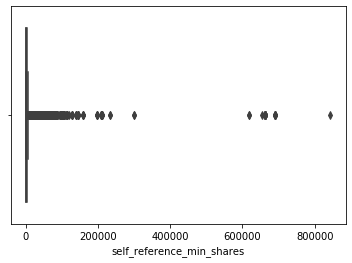

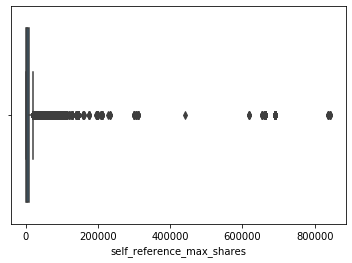

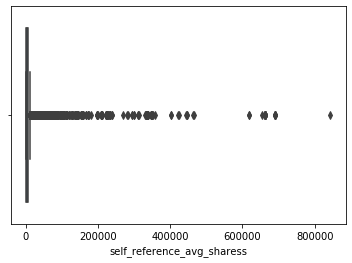

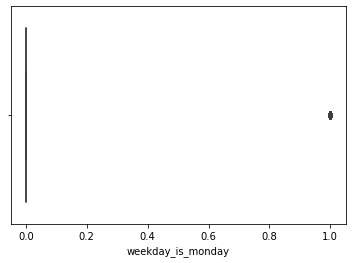

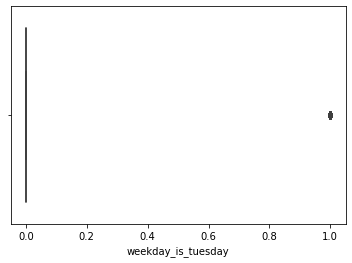

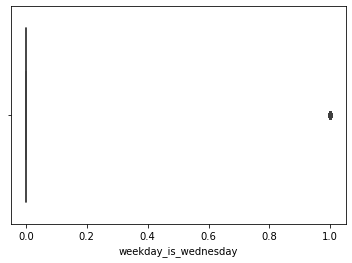

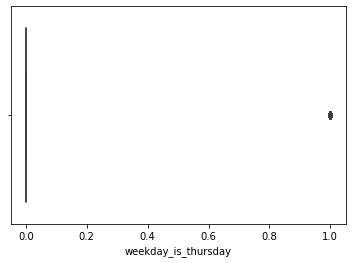

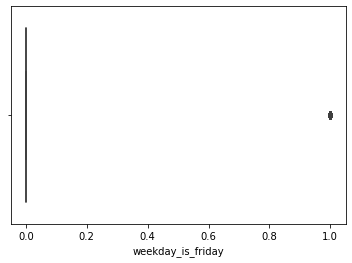

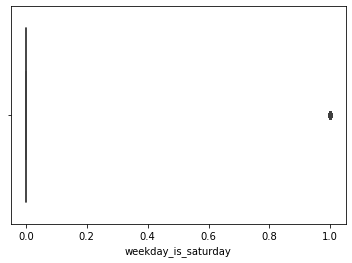

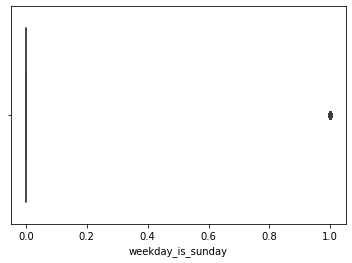

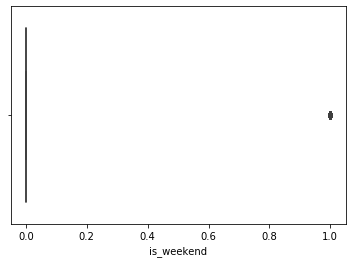

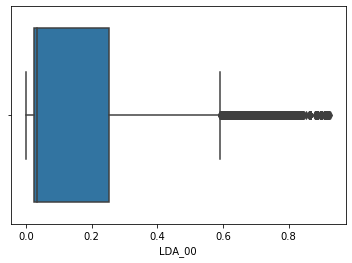

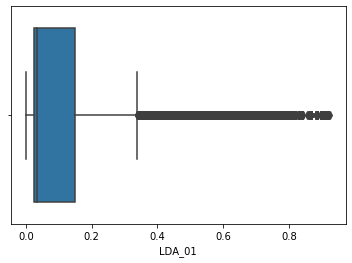

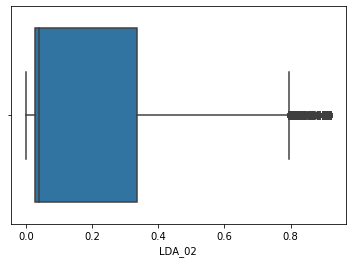

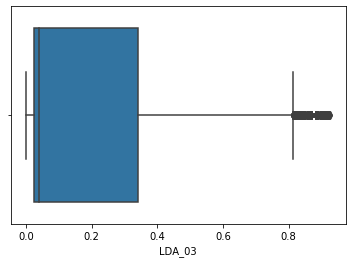

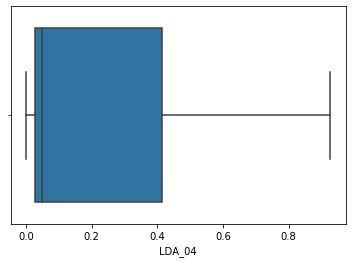

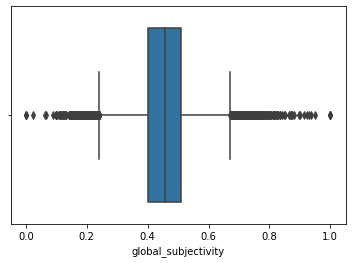

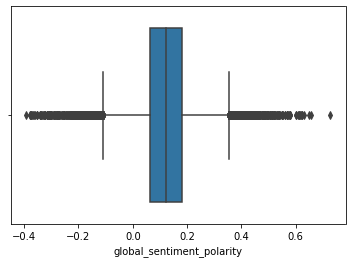

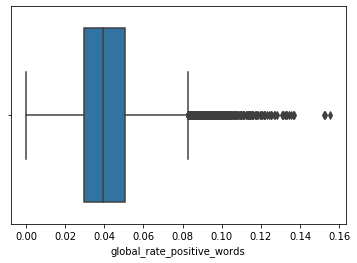

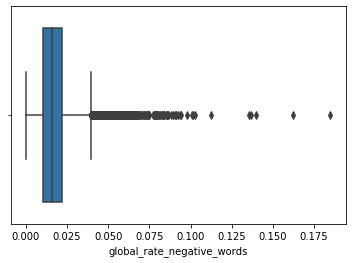

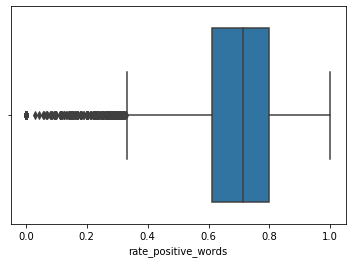

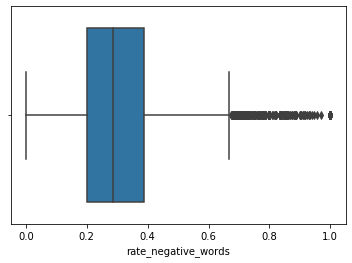

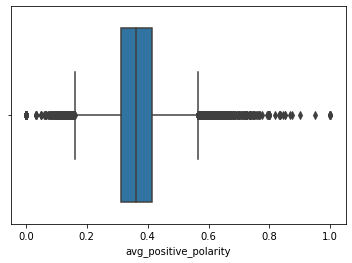

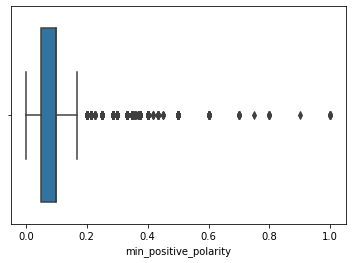

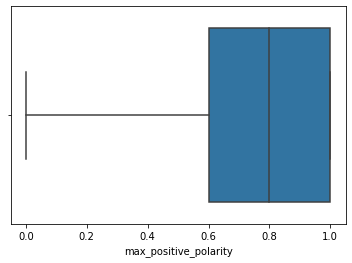

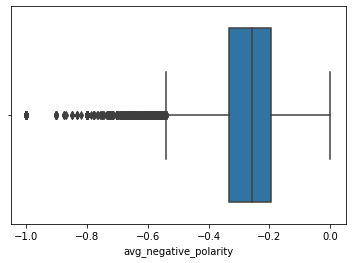

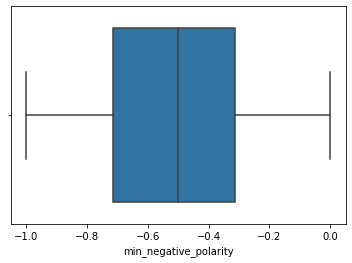

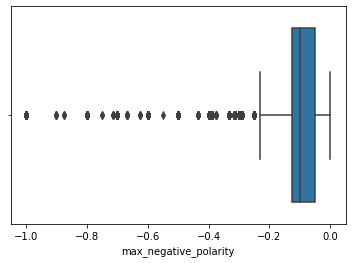

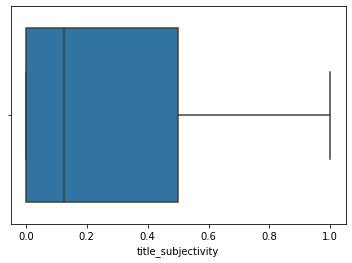

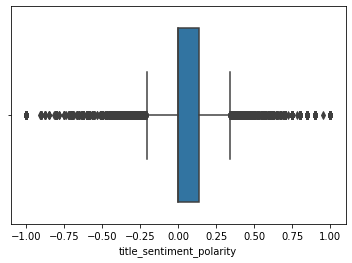

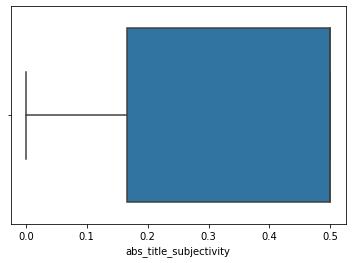

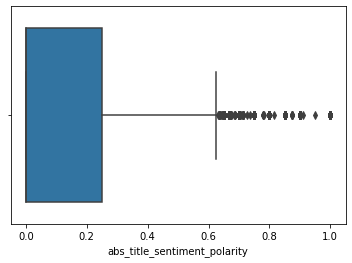

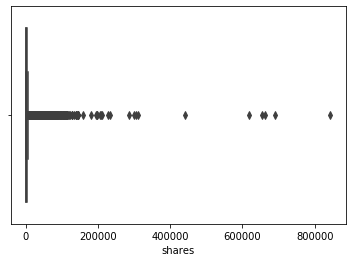

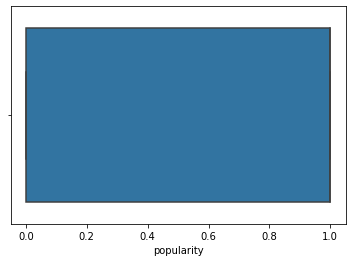

In [34]:
num_cols = df.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(df[num_cols[i]])
    plt.show()

In [35]:


for column in num_cols:    
    q1 = df[column].quantile(0.25)    # First Quartile
    q3 = df[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df[(df[column] < llimit) | (df[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 155
4.5
16.5
3.0
Number of outliers in "n_tokens_content" : 1875
-446.0
1434.0
470.0
Number of outliers in "n_unique_tokens" : 490
0.27688172230725006
0.8116487408852499
0.13369175464449995
Number of outliers in "num_hrefs" : 2636
-8.5
27.5
9.0
Number of outliers in "num_self_hrefs" : 2090
-3.5
8.5
3.0
Number of outliers in "num_imgs" : 7466
-3.5
8.5
3.0
Number of outliers in "num_videos" : 2939
-1.5
2.5
1.0
Number of outliers in "average_token_length" : 552
3.9477737410249993
5.410377035785
0.36565082369000024
Number of outliers in "num_keywords" : 50
1.5
13.5
3.0
Number of outliers in "data_channel_is_lifestyle" : 2077
0.0
0.0
0.0
Number of outliers in "data_channel_is_entertainment" : 6856
0.0
0.0
0.0
Number of outliers in "data_channel_is_bus" : 6235
0.0
0.0
0.0
Number of outliers in "data_channel_is_socmed" : 2311
0.0
0.0
0.0
Number of outliers in "data_channel_is_tech" : 7325
0.0
0.0
0.0
Number of outliers in "data_channel_is_world" : 8168

In [36]:
# we can remove this ouliers after applying transformation

## Scaling of Dataset

In [37]:
# df2_num  dataframe contains numerical feaures.

df2_num=df.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)

# df2_cat dataframe contains catagoricl features.

df2_cat=df[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]

In [38]:
# We will check distribution of attributes to decide the method of scaling

# Drop target variable from df2_num

df2_num = df2_num.drop('shares',axis=1)

In [39]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

In [40]:
# Finding negative values.

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

In [41]:
# We will use box-cox method of scaling because the distribution of attributes is not normal and has a lot of negative values

In [42]:
#converting negative values to positive values for applying Box-Cox method and creating new feature.

for i in negcols:
    m=df2_num[i].min()
    name=i +'_new'
    df2_num[name]=((df2_num[i]+1)-m)

In [43]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_v

In [44]:
# Droping old negative column

for i in negcols:
    df2_num.drop(i,axis=1,inplace=True)

In [45]:
# Checking negative columns

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index([], dtype='object')

In [46]:
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(method='box-cox',standardize=False)
df2_num_add=pt.fit_transform(df2_num)
df2_num_add=(pd.DataFrame(df2_num_add,columns=df2_num.columns))

In [47]:
#Treating outlier :  

for col in df2_num_add.columns:
    percentiles = df2_num_add[col].quantile([0.01,0.99]).values
    df2_num_add[col][df2_num_add[col] <= percentiles[0]] = percentiles[0]
    df2_num_add[col][df2_num_add[col] >= percentiles[1]] = percentiles[1]

In [48]:
# Checking outliers again

num_cols = df2_num_add.select_dtypes(['int64','float64']).columns

for column in num_cols:    
    q1 = df2_num_add[column].quantile(0.25)    # First Quartile
    q3 = df2_num_add[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df2_num_add[(df2_num_add[column] < llimit) | (df2_num_add[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 0
3.0351766196848686
9.255141622951946
1.5549912508167694
Number of outliers in "n_tokens_content" : 0
3.8606109358471805
7.438987854892925
0.8945942297614362
Number of outliers in "n_unique_tokens" : 521
-1.1447330796544382
-0.114579958727683
0.2575382802316888
Number of outliers in "average_token_length" : 0
0.7213218976211404
0.7805063649014634
0.014796116820080751
Number of outliers in "num_keywords" : 0
0.08898030896099218
14.927545776135672
3.7096413667936696
Number of outliers in "num_hrefs_new" : 0
0.549171638846343
3.43450060777549
0.7213322422322868
Number of outliers in "num_self_hrefs_new" : 0
-0.6296914647744499
2.8728195483185948
0.8756277532732611
Number of outliers in "num_imgs_new" : 0
-0.16197366610802344
1.8075267721179116
0.4923751095564838
Number of outliers in "num_videos_new" : 0
-0.6194220377541412
1.0323700629235686
0.41294802516942747
Number of outliers in "kw_min_min_new" : 0
-1.7368309261901067
2.8947182103168445
1.15

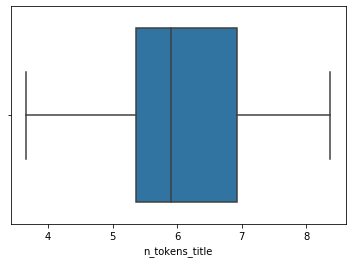

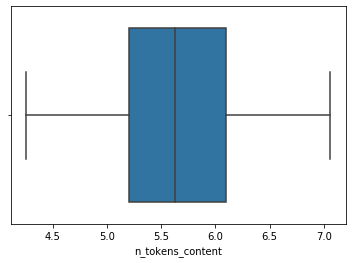

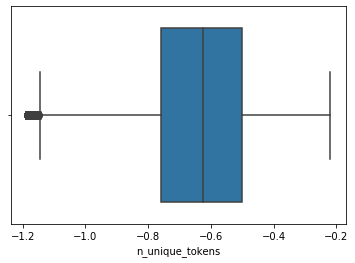

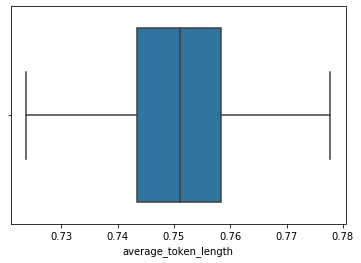

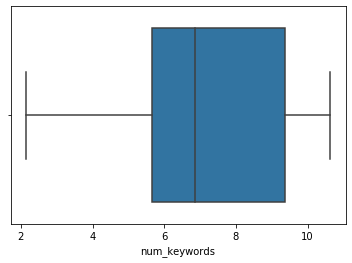

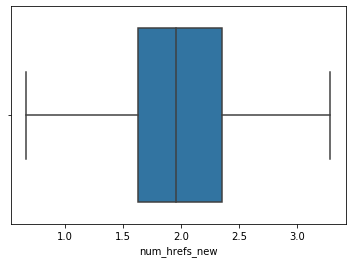

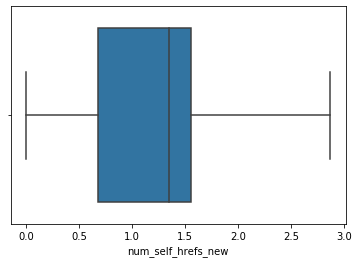

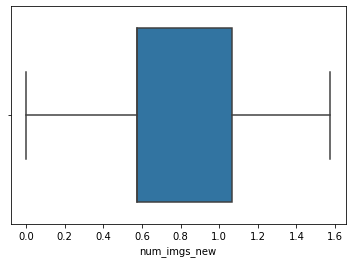

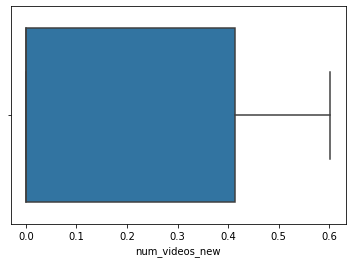

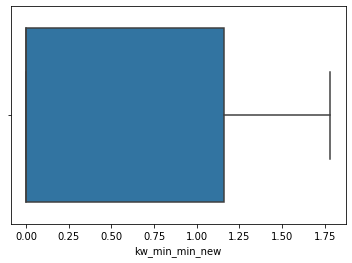

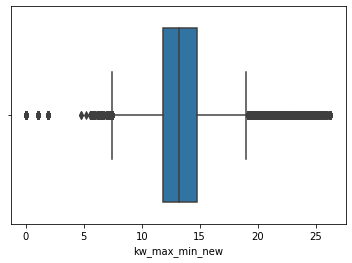

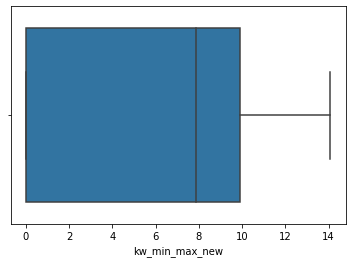

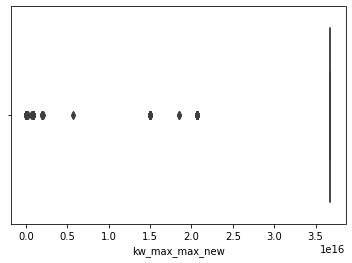

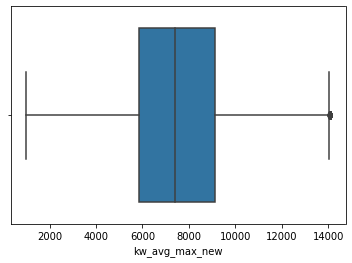

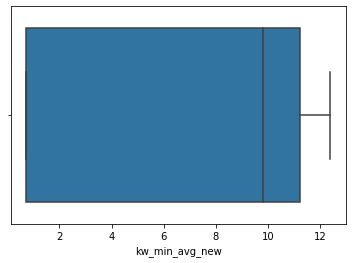

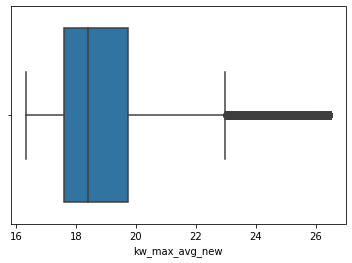

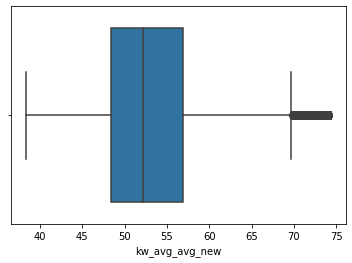

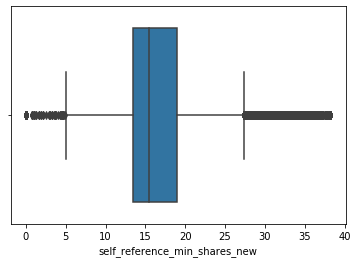

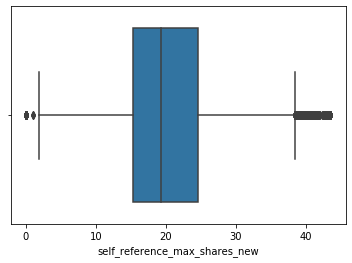

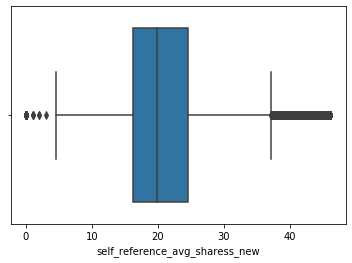

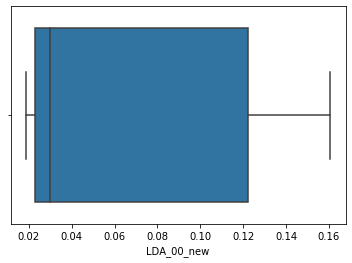

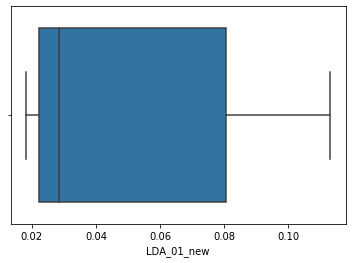

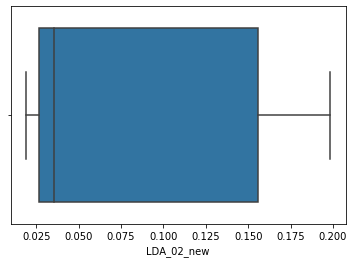

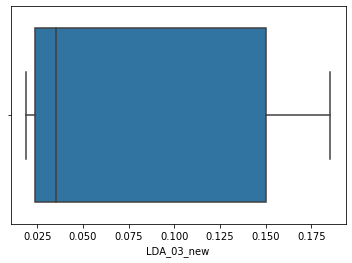

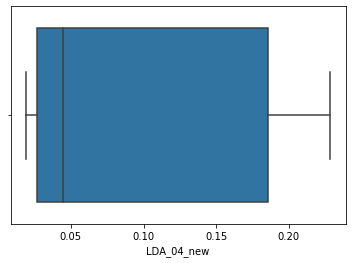

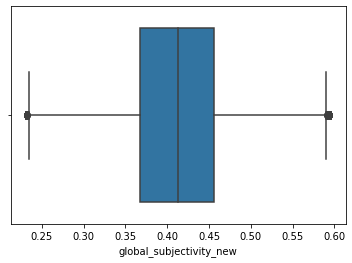

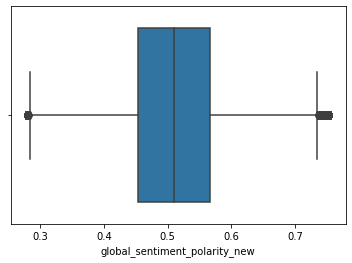

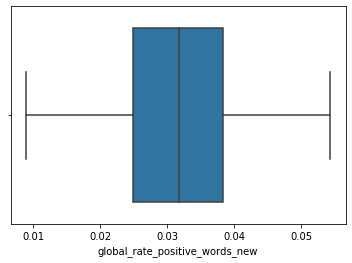

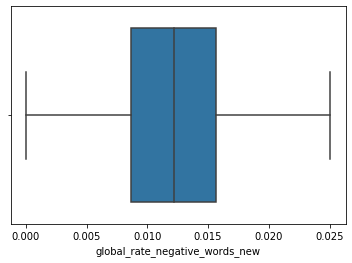

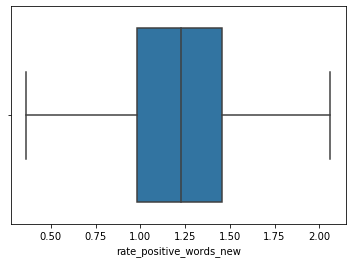

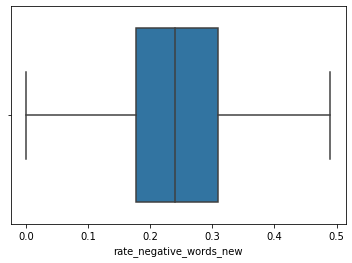

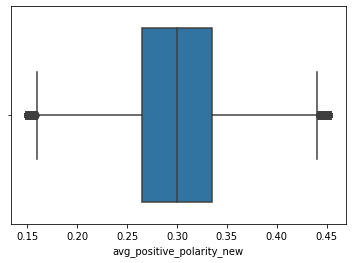

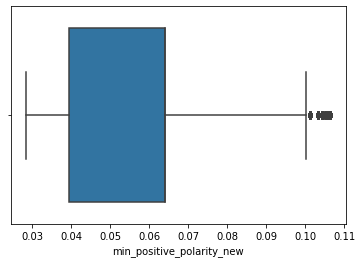

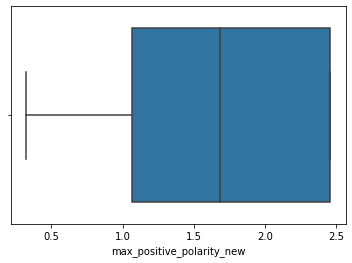

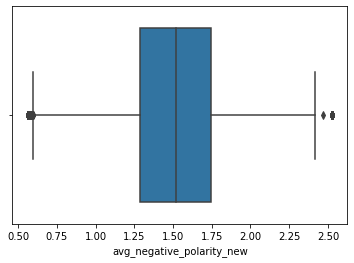

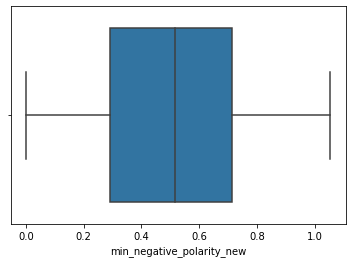

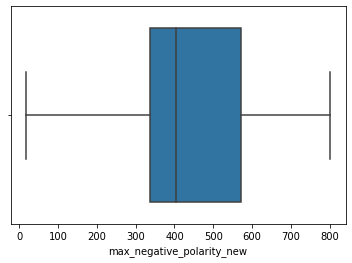

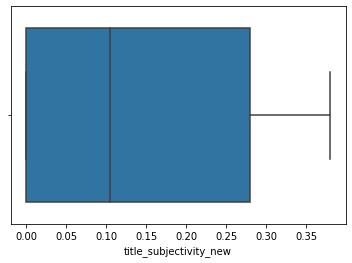

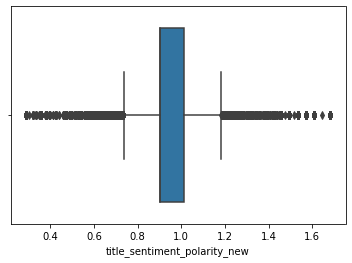

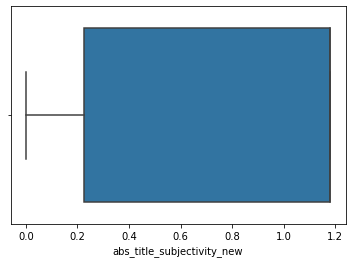

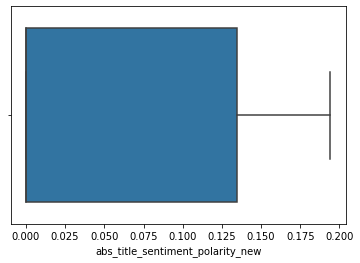

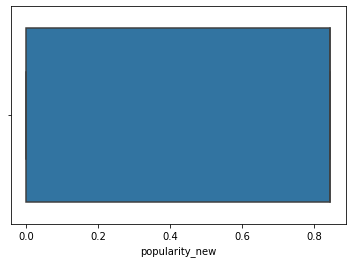

In [49]:
num_cols = df2_num_add.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(df2_num_add[num_cols[i]])
    plt.show()

In [50]:
df2_num_add.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_00_new', 'LDA_01_new',
       'LDA_02_new', 'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new

In [51]:
df2_cat.columns

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

In [52]:
# Combining numeric features and catogorical features.

df_final=pd.concat([df2_num_add,df2_cat],axis=1)

In [53]:
df_final.shape

(39518, 56)

In [54]:
df_final['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

In [55]:
df_final.isnull().sum()

n_tokens_title                      1055
n_tokens_content                    1055
n_unique_tokens                     1055
average_token_length                1055
num_keywords                        1055
num_hrefs_new                       1055
num_self_hrefs_new                  1055
num_imgs_new                        1055
num_videos_new                      1055
kw_min_min_new                      1055
kw_max_min_new                      1055
kw_min_max_new                      1055
kw_max_max_new                      1055
kw_avg_max_new                      1055
kw_min_avg_new                      1055
kw_max_avg_new                      1055
kw_avg_avg_new                      1055
self_reference_min_shares_new       1055
self_reference_max_shares_new       1055
self_reference_avg_sharess_new      1055
LDA_00_new                          1055
LDA_01_new                          1055
LDA_02_new                          1055
LDA_03_new                          1055
LDA_04_new      

In [56]:
df_final=df_final.dropna()

In [57]:
df_final.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_00_new', 'LDA_01_new',
       'LDA_02_new', 'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new

In [58]:
df_final.shape

(37408, 57)

## Classification Model :

## Logistic Regression

In [59]:
df.head(1)

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0.0,0.1875,593,0


In [60]:
X = df.drop(['popularity','shares'], axis=1)

In [61]:
# Putting response variable to y
y = df['popularity']

y.head()

0    0
1    0
2    1
3    0
4    0
Name: popularity, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [64]:
X_train.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']] = scaler.fit_transform(X_train[['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']])

X_train.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
16723,0.288386,-0.358956,0.004031,-0.194531,0.159245,-0.429177,-0.307985,-0.672110,-1.681454,-0.238842,...,-1.244643,0.021849,-1.311032,-1.046984,-1.647042,-0.151474,-0.561402,0.861858,0.307503,0.636728
4794,-0.184368,0.158422,-0.032049,-0.283093,0.159245,1.010554,-0.307985,-0.944478,0.403036,-0.238842,...,-0.940136,-0.917562,1.035187,1.151801,1.205567,0.113175,-0.870080,-0.267800,0.837995,-0.687460
20966,-0.184368,0.109452,-0.005885,1.311023,0.159245,0.770599,-0.307985,0.644836,-0.118087,-0.238842,...,0.216829,-0.917562,1.035187,-0.553506,-0.577314,0.907120,2.216705,1.614963,0.837995,1.519520
33483,0.761141,2.662277,-0.056141,0.691089,1.465779,0.050733,-0.062930,-0.698796,1.445281,-0.238842,...,-1.005420,-0.682709,1.035187,0.355153,0.135838,0.113175,0.796784,0.334684,-1.602266,0.018773
5878,0.288386,-0.363214,-0.000082,-0.548779,0.159245,-0.429177,-0.307985,-0.015972,1.445281,-0.238842,...,-0.220782,0.534256,-0.372544,0.205866,0.135838,-0.151474,0.158848,0.673581,-0.930310,0.416030


In [66]:
# Checking the popularity Rate for the data set 
popular = (sum(df['popularity'])/len(df['popularity'].index))*100
popular

53.204378233627125

In [67]:
# only 53% of content is popular by deafult cutoff - now to the first training model 


import statsmodels.api as sm

In [68]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: invalid value encountered in add
  n * np.log(1 - mu)) * var_weights


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             popularity   No. Observations:                26924
Model:                            GLM   Df Residuals:                    26870
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 08 May 2021   Deviance:                          nan
Time:                        15:11:52   Pearson chi2:                 1.34e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           426.6590   2492.524      0.171      0.864   -4458.599    5311.917
n_tokens_title                    0.0084      0.014      0.608      0.543      -0.019       0.035
n_tokens_content                  0.0653      0.024      2.704      0.007       0.018       0.113
n_unique_tokens                  -3.5986      0.919     -3.914      0.000      -5.401      -1.797
num_hrefs                         0.1060      0.018      5.817      0.000       0.070       0.142
num_self_hrefs                   -0.0683      0.016     -4.247      0.000      -0.100      -0.037
num_imgs                         -0.0044      0.017     -0.266      0.790      -0.037       0.028
num_videos                        0.0013      0.015      0.087      0.930      -0.028       0.030
average_token_length             -0.0160      0.015     -1.074      0.283      -0.045       0.013
num_keywords                      0.0874      0.016      5.415      0.000       0.056       0.119
data_channel_is_lifestyle        -0.0439      0.021     -2.134      0.033      -0.084      -0.004
data_channel_is_entertainment    -0.1276      0.022     -5.674      0.000      -0.172      -0.083
data_channel_is_bus              -0.1045      0.032     -3.228      0.001      -0.168      -0.041
data_channel_is_socmed            0.1967      0.021      9.258      0.000       0.155       0.238
data_channel_is_tech              0.1565      0.033      4.686      0.000       0.091       0.222
data_channel_is_world            -0.0239      0.035     -0.683      0.494      -0.093       0.045
kw_min_min                        0.1458      0.026      5.606      0.000       0.095       0.197
kw_max_min                       -0.0322      0.022     -1.453      0.146      -0.076       0.011
kw_min_max                       -0.0474      0.015     -3.146      0.002      -0.077      -0.018
kw_max_max                       -0.0589      0.029     -2.061      0.039      -0.115      -0.003
kw_avg_max                       -0.0586      0.025     -2.380      0.017      -0.107      -0.010
kw_min_avg                       -0.0919      0.020     -4.562      0.000      -0.131      -0.052
kw_max_avg                       -0.5273      0.038    -13.833      0.000      -0.602      -0.453
kw_avg_avg                        0.9232      0.046     20.078      0.000       0.833       1.013
self_reference_min_shares         0.1079      0.045      2.388      0.017       0.019       0.196
self_reference_max_shares         0.0337      0.044      0.764      0.445      -0.053       0.120
self_reference_avg_sharess        0.0158      0.066      0.239      0.811      -0.114       0.145
weekday_is_monday                -0.0072      0.011     -0.678      0.498      -0.028       0.014
weekday_is_tuesday               -0.0651     

In [69]:
#removing redundant features with RFE 

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with top 10 variables as output
rfe = rfe.fit(X_train, y_train)

In [70]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [71]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('n_tokens_title', False, 40),
 ('n_tokens_content', False, 2),
 ('n_unique_tokens', False, 31),
 ('num_hrefs', False, 6),
 ('num_self_hrefs', False, 16),
 ('num_imgs', False, 39),
 ('num_videos', False, 46),
 ('average_token_length', False, 34),
 ('num_keywords', False, 4),
 ('data_channel_is_lifestyle', False, 29),
 ('data_channel_is_entertainment', False, 5),
 ('data_channel_is_bus', False, 9),
 ('data_channel_is_socmed', True, 1),
 ('data_channel_is_tech', True, 1),
 ('data_channel_is_world', False, 35),
 ('kw_min_min', True, 1),
 ('kw_max_min', False, 32),
 ('kw_min_max', False, 15),
 ('kw_max_max', False, 10),
 ('kw_avg_max', False, 19),
 ('kw_min_avg', True, 1),
 ('kw_max_avg', True, 1),
 ('kw_avg_avg', True, 1),
 ('self_reference_min_shares', False, 3),
 ('self_reference_max_shares', False, 23),
 ('self_reference_avg_sharess', False, 36),
 ('weekday_is_monday', False, 42),
 ('weekday_is_tuesday', False, 25),
 ('weekday_is_wednesday', False, 26),
 ('weekday_is_thursday', False,

In [72]:
#removing unsupported columns 
col = X_train.columns[rfe.support_]
col

Index(['data_channel_is_socmed', 'data_channel_is_tech', 'kw_min_min',
       'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'is_weekend', 'LDA_01',
       'LDA_02', 'LDA_03'],
      dtype='object')

In [73]:
#showing the less relavant columns 
X_train.columns[~rfe.support_]

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_world', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'LDA_00', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'tit

In [74]:
#running the model again 

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             popularity   No. Observations:                26924
Model:                            GLM   Df Residuals:                    26913
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17045.
Date:                Sat, 08 May 2021   Deviance:                       34090.
Time:                        15:12:06   Pearson chi2:                 6.86e+05
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1455      0.013     11.171      0.000       0.120       0.171
data_channel_is_socmed     0.2427      0.015     16.399      0.000       0.214       0.272
data_channel_is_tech       0.1887      0.015     12.659      0.000       0.160       0.218
kw_min_min                 0.2162      0.014     15.569      0.000       0.189       0.243
kw_min_avg                -0.1796      0.018     -9.849      0.000      -0.215      -0.144
kw_max_avg                -0.5614      0.033    -16.832      0.000      -0.627      -0.496
kw_avg_avg                 1.0183      0.039     25.906      0.000       0.941       1.095
is_weekend                 0.3050      0.014     21.924      0.000       0.278       0.332
LDA_01                    -0.2167      0.014    -15.041      0.000      -0.245      -0.188
LDA_02                    -0.2231      0.016    -13.958      0.000      -0.254      -0.192
LDA_03                    -0.2127      0.017    -12.361      0.000      -0.246      -0.179
==========================================================================================
"""

#### all features seem to be statistically significant 

In [75]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

16723    0.290846
4794     0.737500
20966    0.463595
33483    0.662536
5878     0.641056
177      0.483480
25524    0.601586
11260    0.319615
31286    0.580257
37518    0.509600
dtype: float64

In [76]:
#reshaping y_train_pred or y hat as aaray for validation 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2908458 , 0.73750042, 0.46359488, 0.66253631, 0.64105584,
       0.48348018, 0.6015865 , 0.31961507, 0.58025669, 0.50960042])

In [77]:
#making a new DF to show Y ACTUAL vs Y HAT 
y_train_pred_final = pd.DataFrame({'ACTUAL_Popular':y_train.values, 'ProbabilityOfBeingPopular':y_train_pred})
y_train_pred_final['NewsItemID'] = y_train.index
y_train_pred_final.head()

,ACTUAL_Popular,ProbabilityOfBeingPopular,NewsItemID
0,1,0.290846,16723
1,1,0.737500,4794
2,0,0.463595,20966
3,1,0.662536,33483
4,1,0.641056,5878


In [78]:
#creating a default 0.5 cutoff 

y_train_pred_final['ProbabilityOfBeingPopular_BOOLean'] = y_train_pred_final.ProbabilityOfBeingPopular.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,ACTUAL_Popular,ProbabilityOfBeingPopular,NewsItemID,ProbabilityOfBeingPopular_BOOLean
0,1,0.290846,16723,0
1,1,0.737500,4794,1
2,0,0.463595,20966,0
3,1,0.662536,33483,1
4,1,0.641056,5878,1


In [79]:
#assesing with confusion matrix 
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.ACTUAL_Popular, y_train_pred_final.ProbabilityOfBeingPopular_BOOLean )
print(confusion)

[[7415 5245]
 [4281 9983]]


In [80]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.ACTUAL_Popular, y_train_pred_final.ProbabilityOfBeingPopular_BOOLean))

0.6461892735106225


In [81]:
#not a very good accuracy 

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.ACTUAL_Popular, y_train_pred_final.ProbabilityOfBeingPopular_BOOLean, drop_intermediate = False )

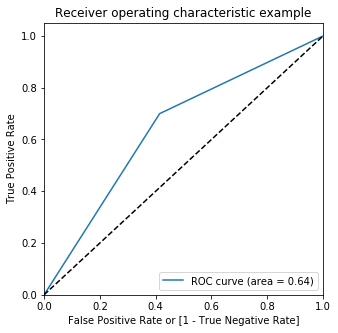

In [84]:
draw_roc(y_train_pred_final.ACTUAL_Popular, y_train_pred_final.ProbabilityOfBeingPopular_BOOLean)

In [85]:
#finding the optimal cutoff 
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.ProbabilityOfBeingPopular.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,ACTUAL_Popular,ProbabilityOfBeingPopular,NewsItemID,ProbabilityOfBeingPopular_BOOLean,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.290846,16723,0,1,1,1,0,0,0,0,0,0,0
1,1,0.737500,4794,1,1,1,1,1,1,1,1,1,0,0
2,0,0.463595,20966,0,1,1,1,1,1,0,0,0,0,0
3,1,0.662536,33483,1,1,1,1,1,1,1,1,0,0,0
4,1,0.641056,5878,1,1,1,1,1,1,1,1,0,0,0


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.ACTUAL_Popular, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.529788  1.000000  0.000000
0.1   0.1  0.529936  0.999720  0.000632
0.2   0.2  0.531682  0.997476  0.006872
0.3   0.3  0.573912  0.955973  0.143444
0.4   0.4  0.625093  0.845415  0.376856
0.5   0.5  0.646189  0.699874  0.585703
0.6   0.6  0.621862  0.478758  0.783096
0.7   0.7  0.561841  0.243059  0.921011
0.8   0.8  0.509545  0.092400  0.979542
0.9   0.9  0.475227  0.011427  0.997788


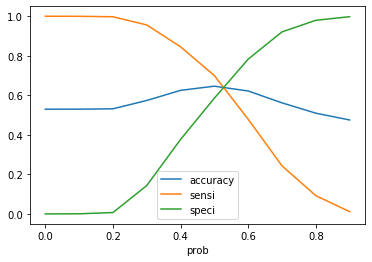

In [87]:

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [88]:
res.params

const                     0.145467
data_channel_is_socmed    0.242728
data_channel_is_tech      0.188749
kw_min_min                0.216220
kw_min_avg               -0.179605
kw_max_avg               -0.561448
kw_avg_avg                1.018314
is_weekend                0.304952
LDA_01                   -0.216712
LDA_02                   -0.223117
LDA_03                   -0.212680
dtype: float64

coef : the coefficients of the independent variables in the regression equation.
Log-Likelihood : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimisation process of finding the set of parameters which result in best fit.
LL-Null : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
Pseudo R-squ. : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model

Feature: 0, Score: 0.14547
Feature: 1, Score: 0.24273
Feature: 2, Score: 0.18875
Feature: 3, Score: 0.21622
Feature: 4, Score: -0.17960
Feature: 5, Score: -0.56145
Feature: 6, Score: 1.01831
Feature: 7, Score: 0.30495
Feature: 8, Score: -0.21671
Feature: 9, Score: -0.22312
Feature: 10, Score: -0.21268


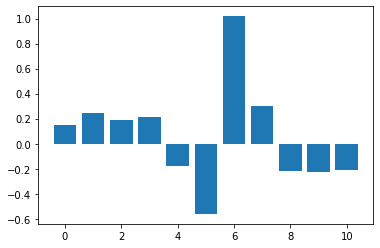

In [92]:

importance = res.params
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### relevant features 
       
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
  
    19. kw_min_min:                    Worst keyword (min. share
 
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
   

    38. is_weekend:                    Was the article published on the weekend?
  
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
  
  